In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [68]:
#df = pd.read_csv('ETH-PREDICTION-MODEL-DATA-WITH-HOLIDAYS.csv')
df = pd.read_csv('ETH-PREDICTION-MODEL-DATA-NO-HOLIDAYS.csv')
#df.head(50)
df.head(5)


,DATE,ETHA,FETH,ETHW,CETH,ETHV,QETH,EZET,ETHE,ETH,...,Open,High,Low,Close,Adj Close,Volume,NextDayOpen,NextDayHigh,NextDayLow,NextDayClose
0,23-Jul-24,266.5,71.3,204.0,7.5,7.6,5.5,13.2,-484.1,15.1,...,3440.77,3539.53,3395.42,3482.00,3482.00,2.446841e+10,3482.15,3487.65,3304.04,3336.34
1,24-Jul-24,17.4,74.5,29.6,0.0,19.8,2.5,3.9,-326.9,45.9,...,3482.15,3487.65,3304.04,3336.34,3336.34,1.604095e+10,3336.36,3341.44,3088.76,3174.43
2,25-Jul-24,70.9,34.3,16.3,0.0,8.0,6.2,0.0,-346.2,58.1,...,3336.36,3341.44,3088.76,3174.43,3174.43,2.529375e+10,3174.05,3285.76,3172.78,3275.95
3,26-Jul-24,87.2,39.3,16.0,0.0,0.0,0.0,6.2,-356.3,44.9,...,3174.05,3285.76,3172.78,3275.95,3275.95,1.599389e+10,3271.45,3396.63,3257.72,3320.54
4,29-Jul-24,58.2,24.8,10.4,0.0,10.9,0.0,2.5,-210.0,4.9,...,3271.45,3396.63,3257.72,3320.54,3320.54,1.833485e+10,3320.64,3365.32,3235.76,3278.67


In [69]:
df.tail(5)

,DATE,ETHA,FETH,ETHW,CETH,ETHV,QETH,EZET,ETHE,ETH,...,Open,High,Low,Close,Adj Close,Volume,NextDayOpen,NextDayHigh,NextDayLow,NextDayClose
34,9-Sep-24,0.0,7.6,1.8,0.0,0.0,0.0,0.0,-22.6,8.0,...,2297.90,2379.79,2274.12,2358.48,2358.48,1.588771e+10,2358.50,2398.50,2323.07,2389.58
35,10-Sep-24,4.3,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2358.50,2398.50,2323.07,2389.58,2389.58,1.279582e+10,2389.60,2389.72,2279.05,2339.84
36,11-Sep-24,0.0,1.2,0.0,0.0,-1.7,0.0,0.0,0.0,0.0,...,2389.60,2389.72,2279.05,2339.84,2339.84,1.535518e+10,2339.84,2390.19,2316.16,2361.78
37,12-Sep-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.1,0.0,...,2339.84,2390.19,2316.16,2361.78,2361.78,1.216263e+10,2361.74,2462.80,2338.14,2441.61
38,13-Sep-24,3.7,0.0,5.2,0.0,0.0,0.0,0.0,-7.4,0.0,...,2361.74,2462.80,2338.14,2441.61,2441.61,1.375964e+10,2418.45,2420.28,2418.45,2420.28


In [70]:
y = df['NextDayHigh']

In [71]:
X = df[['ETHA','FETH','ETHW','CETH',
        'ETHV','QETH','EZET','ETHE','ETH','Open']]


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=410)

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [74]:
# Fit the XGBoost model


#xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=410)
#xgb_model.fit(X_train, y_train)

#model = xgb.XGBRegressor(n_estimators=100, random_state=410)
#model.fit(X_train, y_train)


In [75]:
predictions = model.predict(X_test)
predictions

array([2584.13223424, 2547.48865763, 2507.54482112, 2731.46921974,
       3062.14189859, 3308.30325065, 2668.38270642, 2623.81518009,
       2611.28060301, 2603.02380741, 2492.30515298, 2755.58086486])

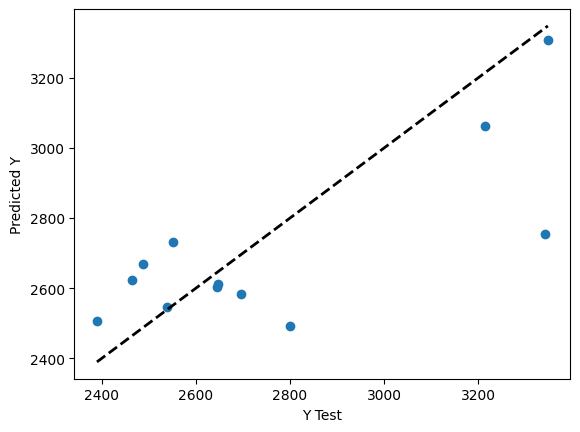

In [76]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

In [77]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 159.82523110600087
MSE: 48448.08407294317
RMSE: 220.1092548552722


In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)*100

55.63054096046274

In [79]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print("Predicted and Actual Values:")
print(results_df)

Predicted and Actual Values:
     Actual    Predicted
19  2695.91  2584.132234
27  2539.92  2547.488658
36  2390.19  2507.544821
10  2551.56  2731.469220
7   3214.53  3062.141899
5   3347.64  3308.303251
30  2488.92  2668.382706
31  2465.39  2623.815180
18  2648.28  2611.280603
21  2644.82  2603.023807
22  2799.33  2492.305153
1   3341.44  2755.580865


<Axes: xlabel='NextDayHigh', ylabel='Count'>

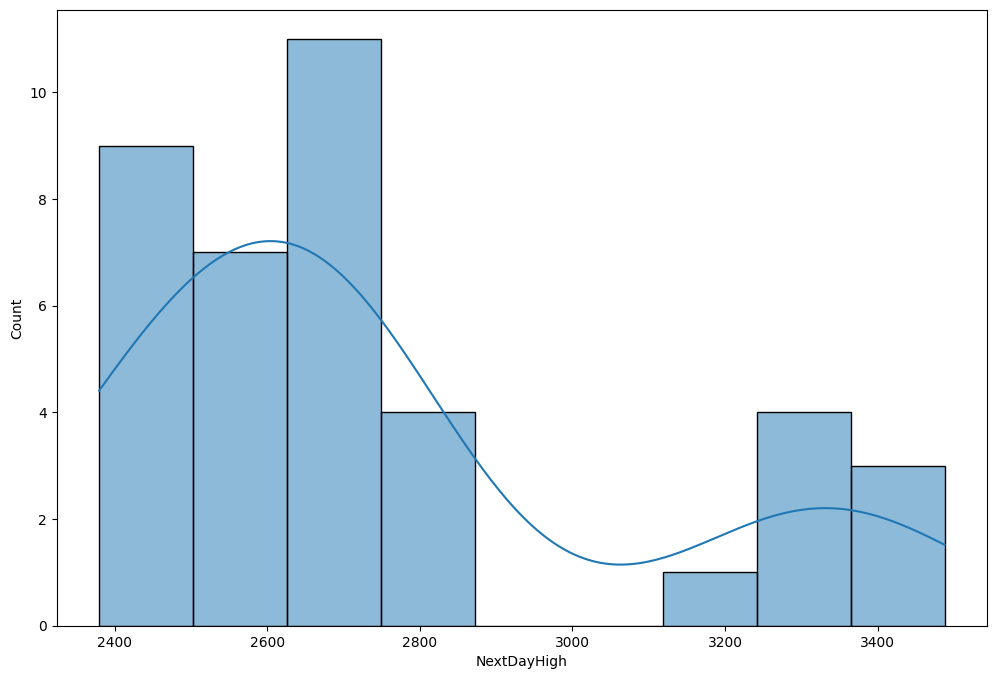

In [80]:
plt.figure(figsize = (12,8))
sns.histplot(x= 'NextDayHigh',data = df,kde = True)

<Axes: xlabel='NextDayHigh', ylabel='Count'>

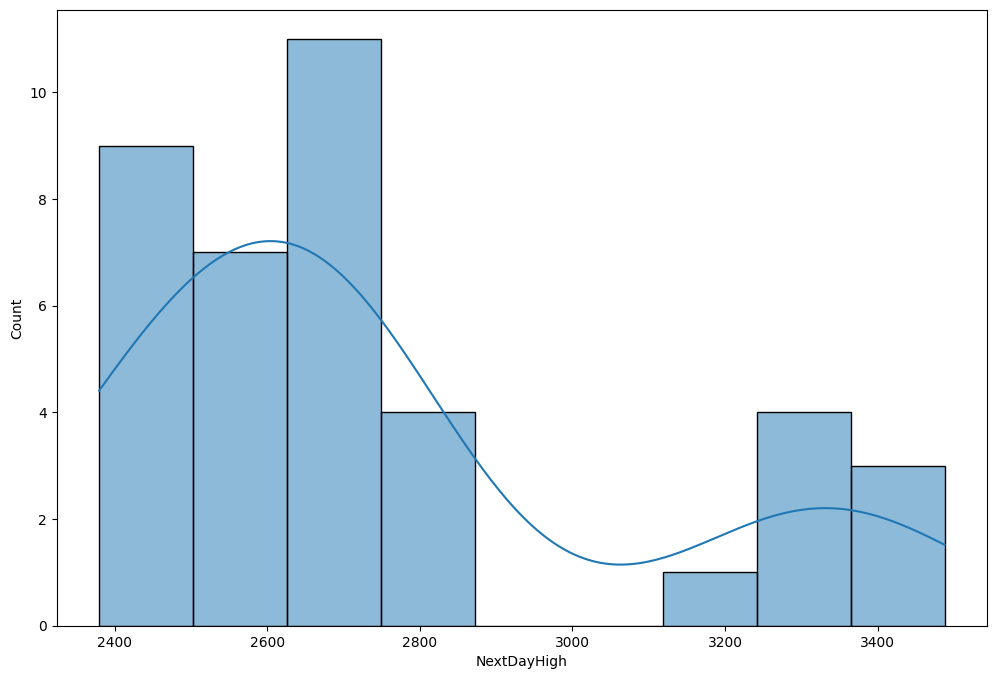

In [81]:
df['prediction'] = np.log(df['NextDayHigh'])
plt.figure(figsize = (12,8))
sns.histplot(x= 'NextDayHigh',data = df,kde = True)

In [82]:


#X = df[['ETHA','FETH','ETHW','CETH',
#        'ETHV','QETH','EZET','ETHE','ETH']]

new_data = pd.DataFrame({
    'ETHA': [0],
    'FETH': [1],
    'ETHW': [0],
    'CETH': [0.2],
    'ETHV': [0.5],
    'QETH': [0],
    'EZET': [0],
    'ETHE': [-0.2],
    'ETH': [1],
    'Open': [2418.45],
})


# Predicting the expenses for the new data
#predicted_ETH_closing_price = xgb_model.predict(new_data)

predicted_ETH_nextdayhigh_price = model.predict(new_data)

print(predicted_ETH_nextdayhigh_price )

#print(f"Predicted btc closing price: {predicted_btc_closing_price:.2f}")

# Convert the predicted log expenses back to the original scale
#predicted_value = np.exp(predicted_btc_closing_price[0])
                      
#print(f"Predicted value: {predicted_value:.2f}")

[2535.96485134]
